# AIML-Regression_SIMPLE LINEAR REGRESSION

In [1]:
# Importing libraries required
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm

In [2]:
# Loading the data
df = pd.read_csv("Student data.csv")
df.head(5 )

,S.No,MARKS,Salary
0,1,62.00,270000
1,2,76.33,200000
2,3,72.00,240000
3,4,60.00,250000
4,5,61.00,180000


In [3]:
# Checking for missing values.From the output we see there are no missing values
df.isnull().sum()

S.No      0
MARKS     0
Salary    0
dtype: int64

In [4]:
# information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   S.No    50 non-null     int64  
 1   MARKS   50 non-null     float64
 2   Salary  50 non-null     int64  
dtypes: float64(1), int64(2)
memory usage: 1.3 KB


In [5]:
# statistical summary of the data
df.describe()

,S.No,MARKS,Salary
count,50.00000,50.000000,50.000000
mean,25.50000,63.922400,258192.000000
std,14.57738,9.859937,76715.790993
min,1.00000,37.330000,120000.000000
25%,13.25000,57.685000,204500.000000
50%,25.50000,64.700000,250000.000000
75%,37.75000,70.000000,300000.000000
max,50.00000,83.000000,450000.000000


In [6]:
# Drop the Column S.No which is observed as a feature in the above statistical summary
df.drop(['S.No'],axis=1,inplace=True)
df.head()

,MARKS,Salary
0,62.00,270000
1,76.33,200000
2,72.00,240000
3,60.00,250000
4,61.00,180000


In [7]:
# statistical summary of the data
df.describe()

,MARKS,Salary
count,50.000000,50.000000
mean,63.922400,258192.000000
std,9.859937,76715.790993
min,37.330000,120000.000000
25%,57.685000,204500.000000
50%,64.700000,250000.000000
75%,70.000000,300000.000000
max,83.000000,450000.000000


In [8]:
# Independent Variable / feature
X = sm.add_constant(df["MARKS"] )

In [9]:
# Dependent Variable / Target Variable
Y = df["Salary"]

In [10]:
Y.head(5)

0    270000
1    200000
2    240000
3    250000
4    180000
Name: Salary, dtype: int64

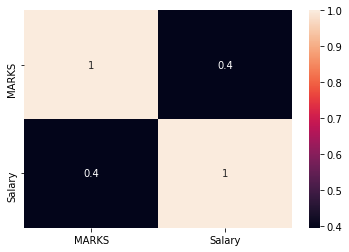

In [11]:
# heat map to understand correlations
sns.heatmap(df.corr(),annot=True)

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
# Data into train and Test
X_train, X_test, y_train, y_test = train_test_split( X,Y,train_size = 0.8,random_state = 100 )

In [14]:
# OLS Model
df_lm = sm.OLS( y_train, X_train).fit()

In [15]:
print( df_lm.params )

const    30587.285652
MARKS     3560.587383
dtype: float64


## Salary = 30587.285 + 3560.587 * (Marks)

In [16]:
# Regression Model Summary
df_lm.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                  Results: Ordinary least squares
===================================================================
Model:              OLS              Adj. R-squared:     0.190     
Dependent Variable: Salary           AIC:                1008.8680 
Date:               2021-10-03 09:30 BIC:                1012.2458 
No. Observations:   40               Log-Likelihood:     -502.43   
Df Model:           1                F-statistic:        10.16     
Df Residuals:       38               Prob (F-statistic): 0.00287   
R-squared:          0.211            Scale:              5.0121e+09
-------------------------------------------------------------------
         Coef.     Std.Err.    t    P>|t|     [0.025       0.975]  
-------------------------------------------------------------------
const  30587.2857 71869.4497 0.4256 0.6728 -114904.8089 176079.3802
MARKS   3560.5874  1116.9258 3.1878 0.0029    1299.4892   5821.6855
-------------------------------------------------------------------
Omnibus:                2.048        Durbin-Watson:           2.611
Prob(Omnibus):          0.359        Jarque-Bera (JB):        1.724
Skew:                   0.369        Prob(JB):                0.422
Kurtosis:               2.300        Condition No.:           413  
===================================================================

"""